In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Exploratory Data Analysis

Exploratory data analysis will be conducted to understand and interpret the data sets by summarizing the dataset, identifying patterns, and outline the potensial issues. This process will include but not limited to:

1. Data Quality Assessment
2. Descriptive Statistics
3. Data Distribution
4. Time Series Analysis

### Data Preparation

In [4]:
def summary(df):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    min = df.min()
    max = df.max()
    uniques = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    cols = ['types', 'counts', 'uniques', 'nulls', 'min', 'max']
    
    table = pd.concat([types, counts, uniques, nulls, min, max], axis=1, sort=True)
    table.columns = cols
    
    return table

details = summary(df)
display(details.sort_values(by='nulls', ascending=False))

/var/folders/jd/zh0k3k1x0xqct6rxmrl2bndr0000gn/T/ipykernel_3183/1114508324.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min = df.min()
/var/folders/jd/zh0k3k1x0xqct6rxmrl2bndr0000gn/T/ipykernel_3183/1114508324.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max = df.max()


Data shape: (541909, 8)


,types,counts,uniques,nulls,min,max
CustomerID,float64,406829,4373,135080,12346.0,18287.0
Description,object,540455,4224,1454,NaN,NaN
Country,object,541909,38,0,Australia,Unspecified
InvoiceDate,datetime64[ns],541909,23260,0,2010-12-01 08:26:00,2011-12-09 12:50:00
InvoiceNo,object,541909,25900,0,NaN,NaN
Quantity,int64,541909,722,0,-80995,80995
StockCode,object,541909,4070,0,NaN,NaN
UnitPrice,float64,541909,1630,0,-11062.06,38970.0


Based on data summarization above, we found a couple of problem with the dataset.
1. There is a lot of null value in CustomerID and Description column
2. There is a negative value in quantity and unit price column

We also see:
1. Customer may vary by geopgraphy, hence we will see customers are mostly from
2. Max date is only untul 09 Dec 2011, indicating there might be a month which doesn't have full month sales

In [7]:
#Cancellation Analysis

df['Status'] = np.where(df['InvoiceNo'].str.contains('c', case=False, na=False), 'Cancel', 'Order')

invoices_by_status = df.groupby('Status')['InvoiceNo'].nunique()

print(invoices_by_status)

Status
Cancel     3836
Order     22064
Name: InvoiceNo, dtype: int64


In [11]:
#There is 3836 order that got cancelled. This data will be filtered out

df = df[df['Status'] != 'Cancel']

Status
Order    22064
Name: InvoiceNo, dtype: int64


In [12]:
df.Country.value_counts(normalize=True)

United Kingdom          0.915514
Germany                 0.016976
France                  0.015786
EIRE                    0.014821
Spain                   0.004666
Netherlands             0.004437
Belgium                 0.003813
Switzerland             0.003693
Portugal                0.002818
Australia               0.002225
Norway                  0.002013
Italy                   0.001423
Channel Islands         0.001404
Finland                 0.001286
Cyprus                  0.001153
Sweden                  0.000847
Unspecified             0.000837
Austria                 0.000747
Denmark                 0.000713
Poland                  0.000620
Japan                   0.000603
Israel                  0.000554
Hong Kong               0.000533
Singapore               0.000417
Iceland                 0.000342
USA                     0.000336
Canada                  0.000284
Greece                  0.000272
Malta                   0.000210
United Arab Emirates    0.000128
European C

In [13]:
#As mostly our customer comes from United Kingdom, we will filter the data to only United Kingdom Customers

df = df[df.Country == 'United Kingdom']

In [14]:
#Drop null value

df.dropna(subset=['CustomerID', 'Description'], inplace=True)

#Drop negative value in quantity & unit price

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Order
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Order
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order


In [16]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Date'] = df['InvoiceDate'].dt.date

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,YearMonth,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Order,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Order,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01


In [17]:
days_per_month = df.groupby('YearMonth')['Date'].nunique()
print(days_per_month)

YearMonth
2010-12    20
2011-01    24
2011-02    24
2011-03    27
2011-04    21
2011-05    25
2011-06    26
2011-07    26
2011-08    26
2011-09    26
2011-10    26
2011-11    26
2011-12     8
Freq: M, Name: Date, dtype: int64


In [18]:
min_max_dates = df.groupby('YearMonth')['Date'].agg(['min','max'])
print(min_max_dates)

                  min         max
YearMonth                        
2010-12    2010-12-01  2010-12-23
2011-01    2011-01-04  2011-01-31
2011-02    2011-02-01  2011-02-28
2011-03    2011-03-01  2011-03-31
2011-04    2011-04-01  2011-04-28
2011-05    2011-05-01  2011-05-31
2011-06    2011-06-01  2011-06-30
2011-07    2011-07-01  2011-07-31
2011-08    2011-08-01  2011-08-31
2011-09    2011-09-01  2011-09-30
2011-10    2011-10-02  2011-10-31
2011-11    2011-11-01  2011-11-30
2011-12    2011-12-01  2011-12-09


In [19]:
# We can see that in December 2011, there is only 8 days of sales. We will exclude December 2011 sales for this analysis.

df = df[df['YearMonth'] != '2011-12']

unique_month = df['YearMonth'].unique()

print(unique_month)

<PeriodArray>
['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11']
Length: 12, dtype: period[M]


In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Status         0
YearMonth      0
Date           0
dtype: int64

In [21]:
#Add total sales

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,YearMonth,Date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Order,2010-12,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Order,2010-12,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Order,2010-12,2010-12-01,20.34


Now we have a clean dataset and can proceed to the next step of analysis

### Exploratory Data Analysis

In [22]:
monthly_sales_summarize = df.groupby('YearMonth').agg(
    TotalSales = ('Revenue','sum'),
    UniqueOrders = ('InvoiceNo','nunique'),
    UniqueCustomer = ('CustomerID','nunique')
)

monthly_sales_summarize.index = monthly_sales_summarize.index.astype(str)

monthly_sales_summarize['AOV'] = monthly_sales_summarize['TotalSales']/monthly_sales_summarize['UniqueOrders']
monthly_sales_summarize['ACV'] = monthly_sales_summarize['TotalSales']/monthly_sales_summarize['UniqueCustomer']
monthly_sales_summarize['OrderFrequency'] = monthly_sales_summarize['UniqueOrders']/monthly_sales_summarize['UniqueCustomer']

print(monthly_sales_summarize)

           TotalSales  UniqueOrders  UniqueCustomer         AOV         ACV  \
YearMonth                                                                     
2010-12    498661.850          1291             815  386.260147  611.855031   
2011-01    442190.060           874             647  505.938284  683.446770   
2011-02    355655.630           896             679  396.937087  523.793270   
2011-03    467198.590          1177             880  396.940178  530.907489   
2011-04    409559.141          1058             784  387.106939  522.396864   
2011-05    551568.820          1403             962  393.135296  573.356362   
2011-06    524915.480          1249             889  420.268599  590.456108   
2011-07    485612.251          1200             859  404.676876  565.322760   
2011-08    498453.320          1133             834  439.941147  597.665851   
2011-09    796780.272          1568            1146  508.150684  695.270743   
2011-10    824766.220          1705            1230 

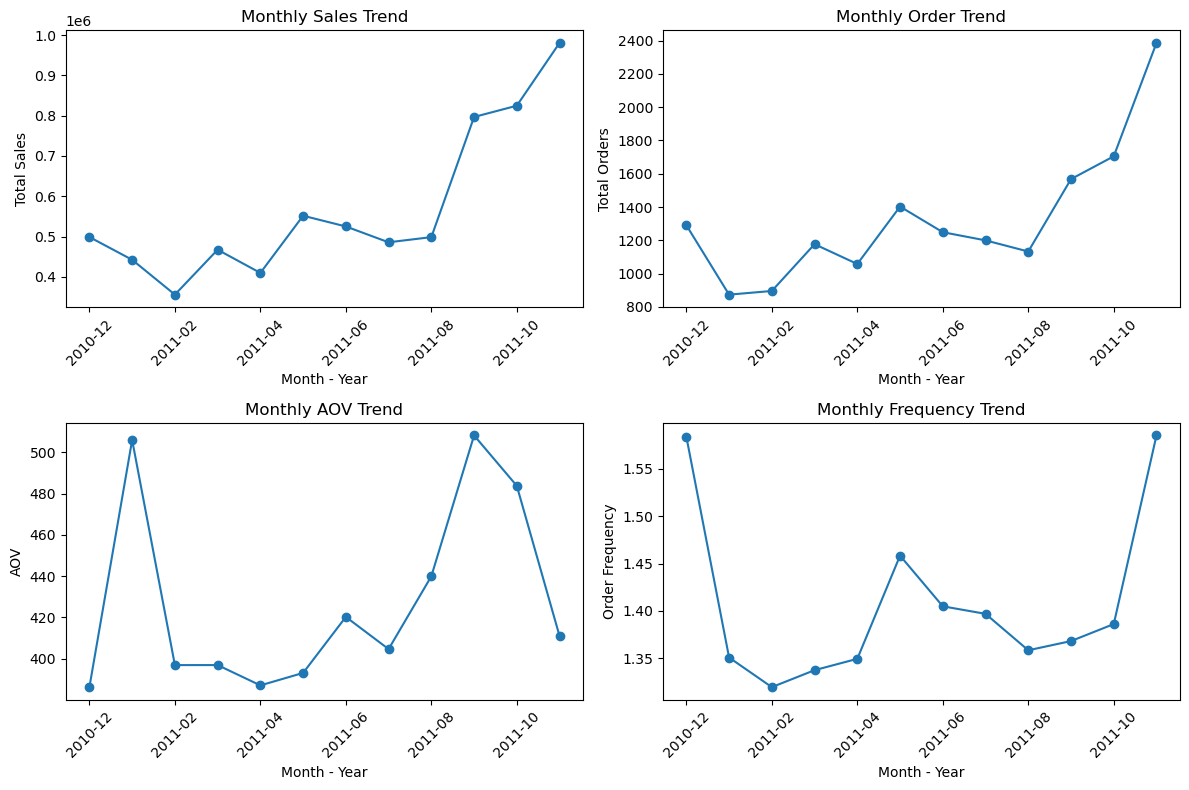

In [23]:
#Subplot

fig,axes = plt.subplots(2,2, figsize = (12,8))

axes = axes.flatten()

monthly_sales_summarize['TotalSales'].plot(
    kind='line', marker='o', ax=axes[0], title="Monthly Sales Trend"
)

axes[0].set_xlabel('Month - Year')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

monthly_sales_summarize['UniqueOrders'].plot(
    kind='line', marker='o', ax=axes[1], title="Monthly Order Trend"
)

axes[1].set_xlabel('Month - Year')
axes[1].set_ylabel('Total Orders')
axes[1].tick_params(axis='x', rotation=45)

monthly_sales_summarize['AOV'].plot(
    kind='line', marker='o', ax=axes[2], title="Monthly AOV Trend"
)

axes[2].set_xlabel('Month - Year')
axes[2].set_ylabel('AOV')
axes[2].tick_params(axis='x', rotation=45)

monthly_sales_summarize['OrderFrequency'].plot(
    kind='line', marker='o', ax=axes[3], title="Monthly Frequency Trend"
)

axes[3].set_xlabel('Month - Year')
axes[3].set_ylabel('Order Frequency')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

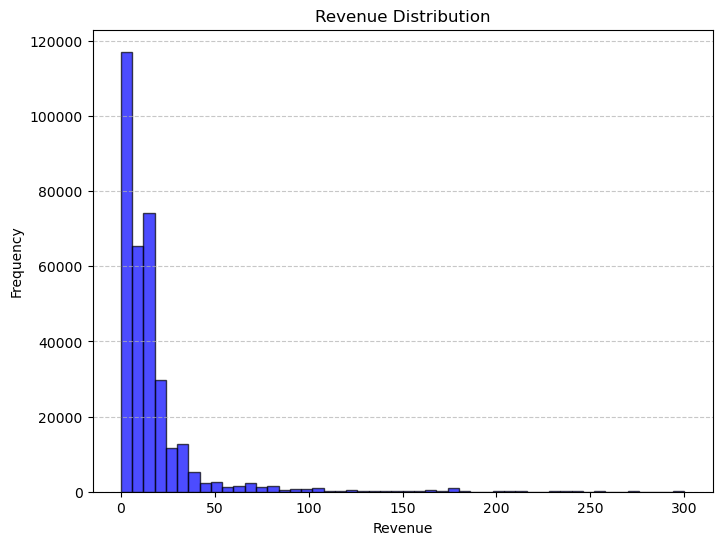

        Mean  Median    Min      Max  0.25  0.75         Std
0  20.193807    10.2  0.001  77183.6   4.2  17.7  164.807012


In [24]:
plt.figure(figsize=(8,6))

revenue_per_invoice = df.groupby('InvoiceNo')['Revenue'].sum()

plt.figure(figsize=(8, 6))
plt.hist(df['Revenue'], bins=50, range=(0, 300), color='blue', edgecolor='black', alpha=0.7)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


revenue_summary = pd.DataFrame({
    'Mean': [df['Revenue'].mean()],
    'Median': [df['Revenue'].median()],
    'Min': [df['Revenue'].min()],
    'Max': [df['Revenue'].max()],
    '0.25': [df['Revenue'].quantile(0.25)],
    '0.75': [df['Revenue'].quantile(0.75)],
    'Std': [df['Revenue'].std()]
})

print(revenue_summary)

Monthly sales figures is fluctuating in the first 8 months, and start to increase in the months after. This might happen because of monthly order trend that also keeps increasing since. One problem that we found is the average customer value is decreasing in the last 2 month, signifying a decrease in the amount spent by our customer per order. The order value distribution is also very spread. Mostly the order were distributed at value below $20.

### User Analysis

In [25]:
df['UserCohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

old_users = df[df['YearMonth'] > df['UserCohort']].groupby('YearMonth')['CustomerID'].nunique()

new_users = df[df['YearMonth'] == df['UserCohort']].groupby('YearMonth')['CustomerID'].nunique()


user_table = pd.DataFrame({
    'Old Users': old_users,
    'New Users': new_users
}).fillna(0).astype(int)

user_table['Total Users'] = user_table['New Users'].cumsum()

user_table['Retention Rate'] = user_table['Old Users']/(user_table['Total Users'] - user_table['New Users']).fillna(0).astype(float) * 100

user_table.index = user_table.index.astype(str)

print(user_table)

           Old Users  New Users  Total Users  Retention Rate
YearMonth                                                   
2010-12            0        815          815             NaN
2011-01          289        358         1173       35.460123
2011-02          339        340         1513       28.900256
2011-03          461        419         1932       30.469266
2011-04          507        277         2209       26.242236
2011-05          706        256         2465       31.960163
2011-06          675        214         2679       27.383367
2011-07          690        169         2848       25.755879
2011-08          693        141         2989       24.332865
2011-09          870        276         3265       29.106725
2011-10          906        324         3589       27.748851
2011-11         1208        297         3886       33.658401


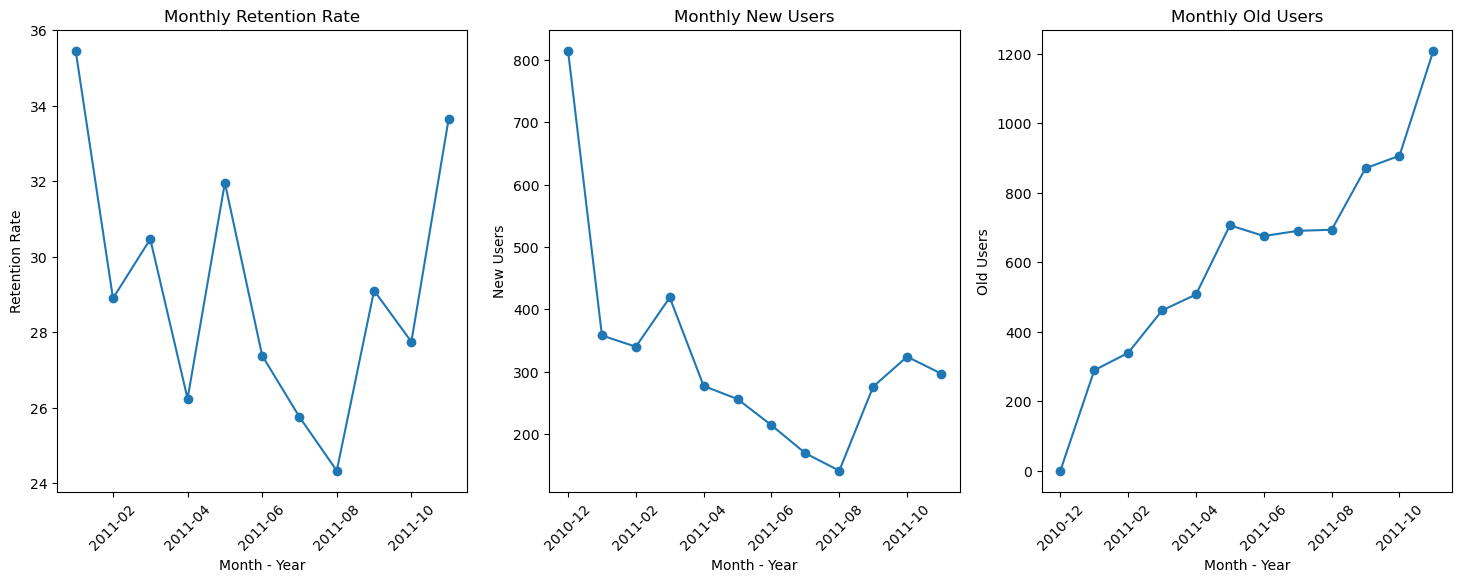

In [26]:
#Subplot

fig,axes = plt.subplots(1,3, figsize = (18,6))

user_table['Retention Rate'].plot(
    kind='line', marker='o', ax=axes[0], title="Monthly Retention Rate"
)

axes[0].set_xlabel('Month - Year')
axes[0].set_ylabel('Retention Rate')
axes[0].tick_params(axis='x', rotation=45)

user_table['New Users'].plot(
    kind='line', marker='o', ax=axes[1], title="Monthly New Users"
)

axes[1].set_xlabel('Month - Year')
axes[1].set_ylabel('New Users')
axes[1].tick_params(axis='x', rotation=45)

user_table['Old Users'].plot(
    kind='line', marker='o', ax=axes[2], title="Monthly Old Users"
)

axes[2].set_xlabel('Month - Year')
axes[2].set_ylabel('Old Users')
axes[2].tick_params(axis='x', rotation=45)

In [31]:
df_cohort = df[['YearMonth','CustomerID','UserCohort']].drop_duplicates()

df_cohort['CohortIndex'] = (df_cohort['YearMonth'] - df_cohort['UserCohort']).apply(
    lambda x:x.n
)

cohort_counts = (
    df_cohort.groupby(['UserCohort', 'CohortIndex'])
    ['CustomerID']
    .nunique()
    .unstack(0)
)

cohort_sizes = cohort_counts.iloc[0]
retention = cohort_counts.divide(cohort_sizes, axis=1).T

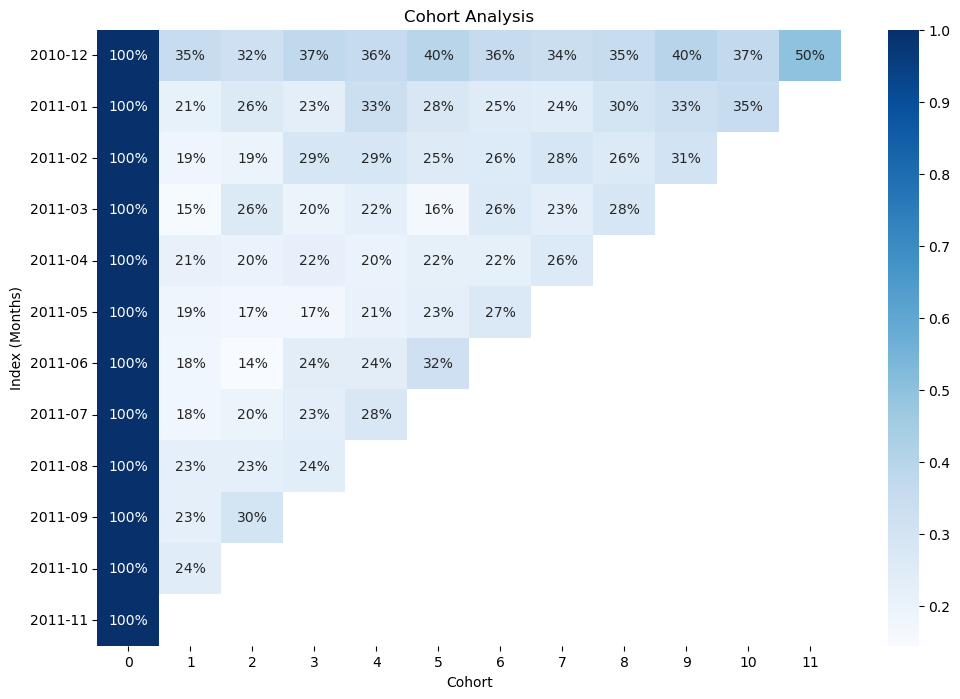

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(
    retention,
    annot=True,
    fmt=".0%",
    cmap="Blues",
    cbar=True
)

plt.title('Cohort Analysis')
plt.ylabel('Index (Months)')
plt.xlabel('Cohort')
plt.show()

The monthly retention rate has been fluctuative for the last 11 months. This is due to inconsistency of retention rate in each cohort, even the transacting old users progressing upward. Acquisition also has become a problem recently as it's been decreasing for 5 months straight.

In [33]:
df_recency = df.groupby(['CustomerID'], as_index=False)['YearMonth'].max()
df_recency['YearMonth'] = df_recency['YearMonth'].dt.to_timestamp()
last_transaction_date = pd.Timestamp('2011-11-01')

df_recency['Recency'] = ((last_transaction_date - df_recency['YearMonth']).dt.days / 30).astype(int)

df_recency.head()

,CustomerID,YearMonth,Recency
0,12346.0,2011-01-01,10
1,12747.0,2011-11-01,0
2,12748.0,2011-11-01,0
3,12749.0,2011-11-01,0
4,12820.0,2011-10-01,1


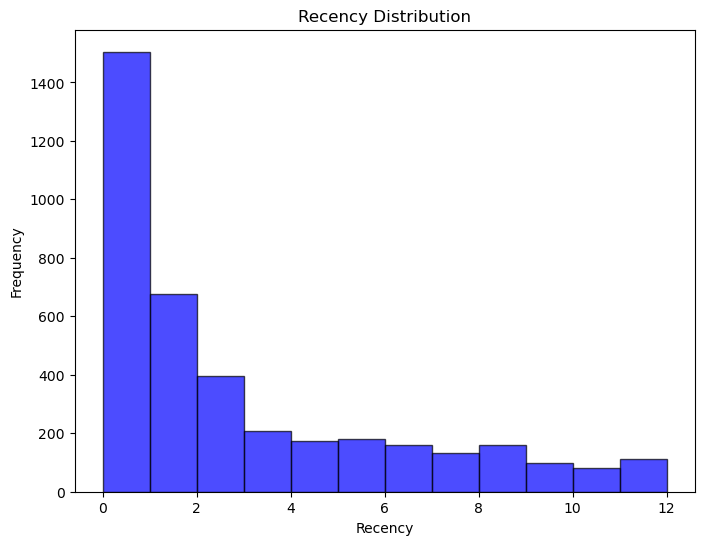

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(df_recency['Recency'], bins=12, range=(0, 12), color='blue', edgecolor='black', alpha=0.7)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()


In [35]:
recency_perc = df_recency.Recency.value_counts(normalize=True)

recency_perc.index.name = 'n Recency'  # Ensure the index is named 'Recency'
recency_perc = recency_perc.reset_index()

print(recency_perc)

    n Recency   Recency
0           0  0.387288
1           1  0.173958
2           2  0.102162
3           3  0.053525
4           5  0.046320
5           4  0.045033
6           6  0.041431
7           8  0.041431
8           7  0.034225
9          11  0.028821
10          9  0.025219
11         10  0.020587


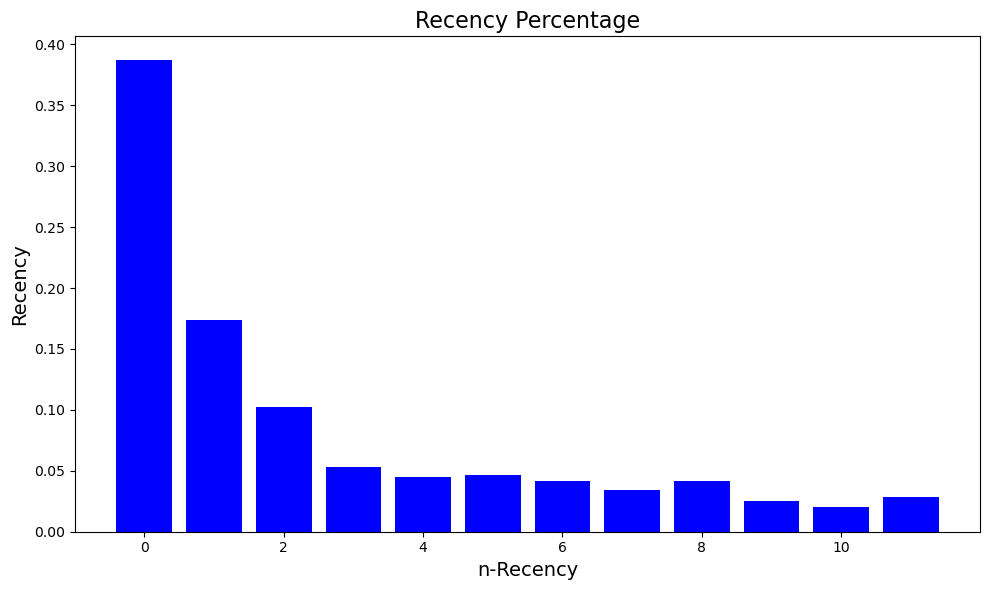

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(recency_perc['n Recency'], recency_perc['Recency'], color='blue')

plt.title('Recency Percentage', fontsize=16)
plt.xlabel('n-Recency', fontsize=14)
plt.ylabel('Recency', fontsize=14)

plt.tight_layout()
plt.show()

Most of the customer didn't place an order recently as only around 38% users placing order in recent month. This also signify a bad users retention.

### Summary

1. Monthly sales have shown growth over the past four months, driven by an increase in the number of orders from our users.
2. However, the average order value has been declining, indicating that customers are spending less per order.
3. The retention rate has fluctuated over the last 11 months, reflecting inconsistencies in retention across cohorts.
4. Only about 38% of our user base has made recent transactions, highlighting a weak performance in user retention.